In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")
data = pd.read_csv("lung_cancer_data.csv")

In [2]:
data.head()

,Patient_ID,Age,Gender,Smoking_History,Years_Smoked,Pack_Years,Family_History_Cancer,Occupation,Exposure_to_Toxins,Residential_Area,...,Previous_Cancer_Diagnosis,Tumor_Size_cm,Metastasis_Status,Stage_of_Cancer,Treatment_Type,Survival_Years,Follow_Up_Visits,Medication_Response,Symptom_Progression,Year_of_Diagnosis
0,1,69,Male,Never,30,3,False,Farmer,False,Urban,...,True,11.02,True,III,Surgery,12,24,Good,Stable,2007
1,2,32,Female,Former,6,61,False,Office Worker,False,Urban,...,False,14.29,True,II,Chemotherapy,6,12,Poor,Stable,2009
2,3,89,Male,Never,2,9,True,Office Worker,True,Rural,...,False,9.47,False,III,Chemotherapy,6,15,Good,Worsening,2015
3,4,78,Female,Never,11,69,False,Factory Worker,True,Urban,...,False,2.22,False,IV,Chemotherapy,13,25,Moderate,Improving,2012
4,5,38,Male,Former,11,57,False,Farmer,False,Rural,...,False,8.26,False,III,Palliative,3,4,Good,Stable,2014


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient_ID                 300000 non-null  int64  
 1   Age                        300000 non-null  int64  
 2   Gender                     300000 non-null  object 
 3   Smoking_History            300000 non-null  object 
 4   Years_Smoked               300000 non-null  int64  
 5   Pack_Years                 300000 non-null  int64  
 6   Family_History_Cancer      300000 non-null  bool   
 7   Occupation                 300000 non-null  object 
 8   Exposure_to_Toxins         300000 non-null  bool   
 9   Residential_Area           300000 non-null  object 
 10  BMI                        300000 non-null  float64
 11  Lung_Function_Test_Result  300000 non-null  float64
 12  Chest_Pain_Symptoms        300000 non-null  bool   
 13  Shortness_of_Breath        30

In [4]:
data.shape

(300000, 30)

In [5]:
data.isna().sum()

Patient_ID                       0
Age                              0
Gender                           0
Smoking_History                  0
Years_Smoked                     0
Pack_Years                       0
Family_History_Cancer            0
Occupation                       0
Exposure_to_Toxins               0
Residential_Area                 0
BMI                              0
Lung_Function_Test_Result        0
Chest_Pain_Symptoms              0
Shortness_of_Breath              0
Chronic_Cough                    0
Weight_Loss                      0
Physical_Activity_Level          0
Dietary_Habits                   0
Air_Quality_Index                0
Comorbidities                90376
Previous_Cancer_Diagnosis        0
Tumor_Size_cm                    0
Metastasis_Status                0
Stage_of_Cancer                  0
Treatment_Type                   0
Survival_Years                   0
Follow_Up_Visits                 0
Medication_Response              0
Symptom_Progression 

In [6]:
data['Comorbidities'] = data['Comorbidities'].fillna('None')


In [7]:
data.isna().sum()

Patient_ID                   0
Age                          0
Gender                       0
Smoking_History              0
Years_Smoked                 0
Pack_Years                   0
Family_History_Cancer        0
Occupation                   0
Exposure_to_Toxins           0
Residential_Area             0
BMI                          0
Lung_Function_Test_Result    0
Chest_Pain_Symptoms          0
Shortness_of_Breath          0
Chronic_Cough                0
Weight_Loss                  0
Physical_Activity_Level      0
Dietary_Habits               0
Air_Quality_Index            0
Comorbidities                0
Previous_Cancer_Diagnosis    0
Tumor_Size_cm                0
Metastasis_Status            0
Stage_of_Cancer              0
Treatment_Type               0
Survival_Years               0
Follow_Up_Visits             0
Medication_Response          0
Symptom_Progression          0
Year_of_Diagnosis            0
dtype: int64

In [8]:
data.describe()

,Patient_ID,Age,Years_Smoked,Pack_Years,BMI,Lung_Function_Test_Result,Air_Quality_Index,Tumor_Size_cm,Survival_Years,Follow_Up_Visits,Year_of_Diagnosis
count,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,150000.500000,53.450403,24.506443,39.52850,28.008541,64.954334,254.393990,7.491391,9.502227,24.488040,2011.998030
std,86602.684716,20.781058,14.432958,23.08892,6.931694,20.196922,141.498432,4.323123,5.762411,14.434192,7.214658
min,1.000000,18.000000,0.000000,0.00000,16.000000,30.000000,10.000000,0.000000,0.000000,0.000000,2000.000000
25%,75000.750000,35.000000,12.000000,20.00000,22.000000,47.500000,132.000000,3.750000,5.000000,12.000000,2006.000000
50%,150000.500000,53.000000,25.000000,40.00000,28.000000,64.900000,254.000000,7.490000,10.000000,24.000000,2012.000000
75%,225000.250000,71.000000,37.000000,59.00000,34.000000,82.500000,377.000000,11.230000,14.000000,37.000000,2018.000000
max,300000.000000,89.000000,49.000000,79.00000,40.000000,100.000000,499.000000,15.000000,19.000000,49.000000,2024.000000


In [9]:
data.set_index("Patient_ID", inplace=True)
data.head()

,Age,Gender,Smoking_History,Years_Smoked,Pack_Years,Family_History_Cancer,Occupation,Exposure_to_Toxins,Residential_Area,BMI,...,Previous_Cancer_Diagnosis,Tumor_Size_cm,Metastasis_Status,Stage_of_Cancer,Treatment_Type,Survival_Years,Follow_Up_Visits,Medication_Response,Symptom_Progression,Year_of_Diagnosis
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,69,Male,Never,30,3,False,Farmer,False,Urban,27.8,...,True,11.02,True,III,Surgery,12,24,Good,Stable,2007
2,32,Female,Former,6,61,False,Office Worker,False,Urban,16.3,...,False,14.29,True,II,Chemotherapy,6,12,Poor,Stable,2009
3,89,Male,Never,2,9,True,Office Worker,True,Rural,18.1,...,False,9.47,False,III,Chemotherapy,6,15,Good,Worsening,2015
4,78,Female,Never,11,69,False,Factory Worker,True,Urban,22.3,...,False,2.22,False,IV,Chemotherapy,13,25,Moderate,Improving,2012
5,38,Male,Former,11,57,False,Farmer,False,Rural,28.3,...,False,8.26,False,III,Palliative,3,4,Good,Stable,2014


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1 to 300000
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        300000 non-null  int64  
 1   Gender                     300000 non-null  object 
 2   Smoking_History            300000 non-null  object 
 3   Years_Smoked               300000 non-null  int64  
 4   Pack_Years                 300000 non-null  int64  
 5   Family_History_Cancer      300000 non-null  bool   
 6   Occupation                 300000 non-null  object 
 7   Exposure_to_Toxins         300000 non-null  bool   
 8   Residential_Area           300000 non-null  object 
 9   BMI                        300000 non-null  float64
 10  Lung_Function_Test_Result  300000 non-null  float64
 11  Chest_Pain_Symptoms        300000 non-null  bool   
 12  Shortness_of_Breath        300000 non-null  bool   
 13  Chronic_Cough              300000 

In [11]:
# Show the numerical columns

numerical_columns = data.select_dtypes(include=["number"]).columns
print(f"Numerical columns: ", numerical_columns)



Numerical columns:  Index(['Age', 'Years_Smoked', 'Pack_Years', 'BMI', 'Lung_Function_Test_Result',
       'Air_Quality_Index', 'Tumor_Size_cm', 'Survival_Years',
       'Follow_Up_Visits', 'Year_of_Diagnosis'],
      dtype='object')


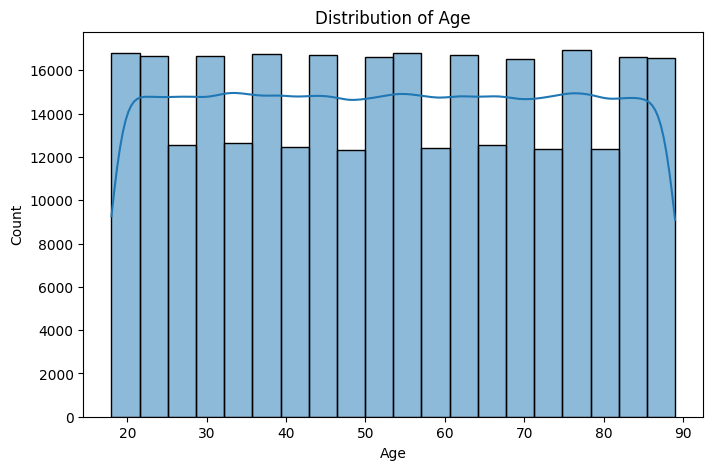

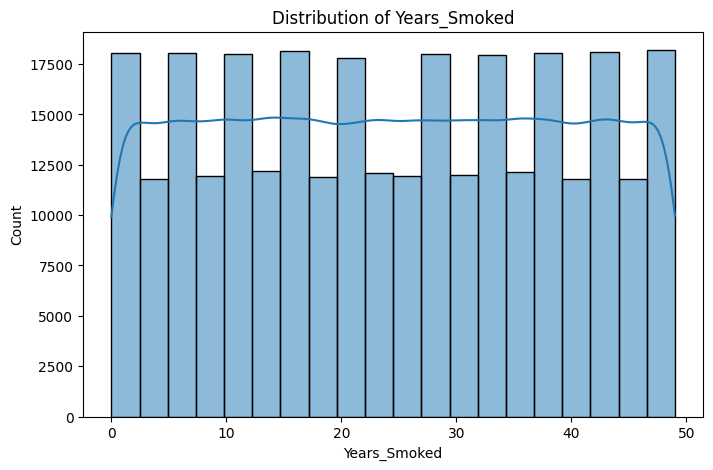

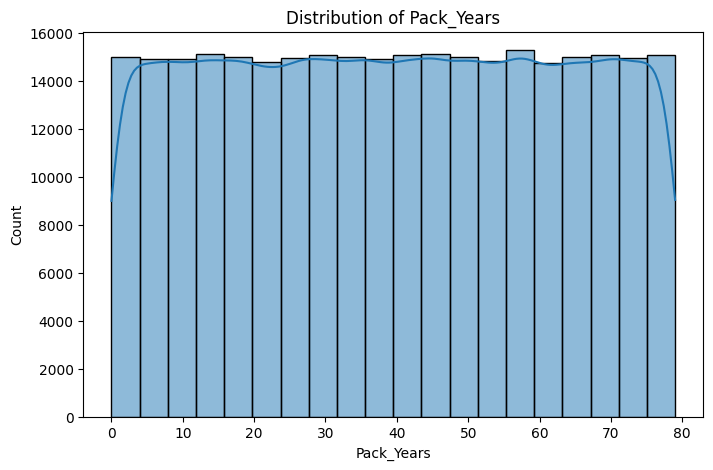

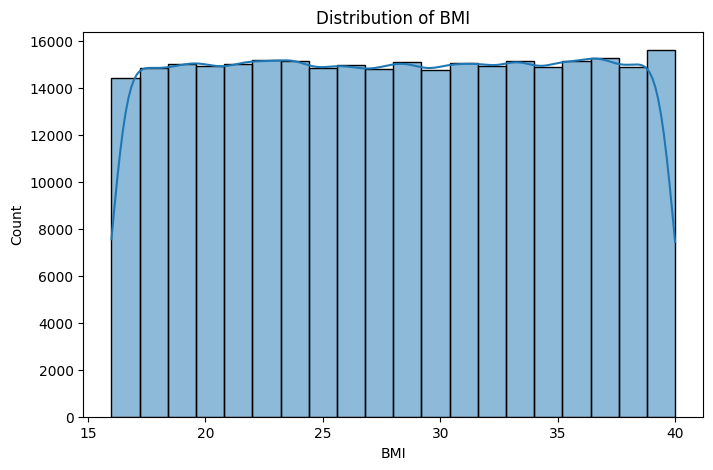

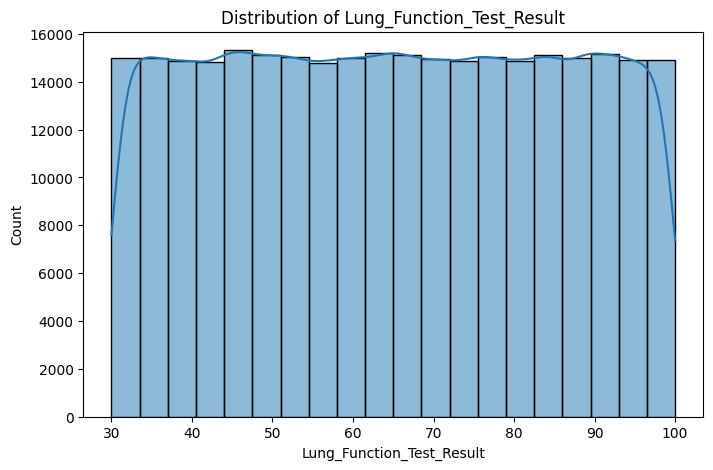

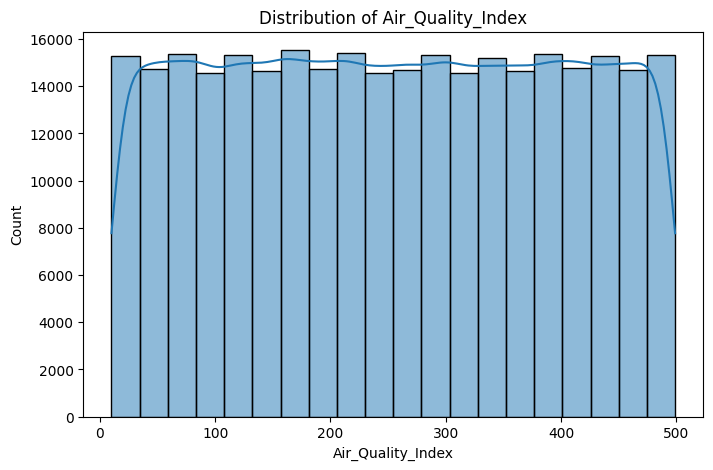

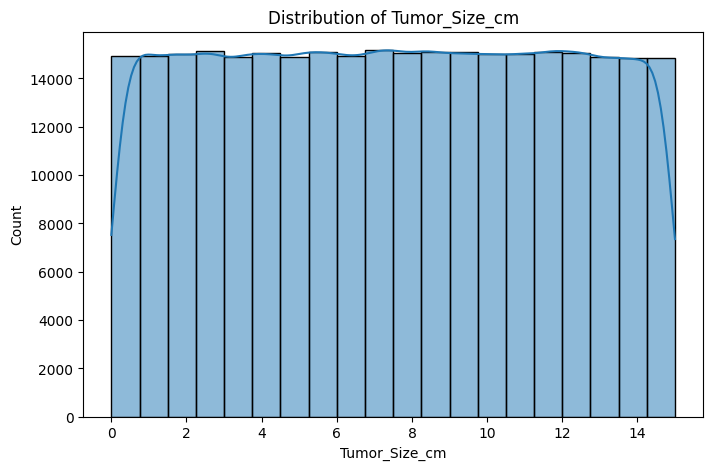

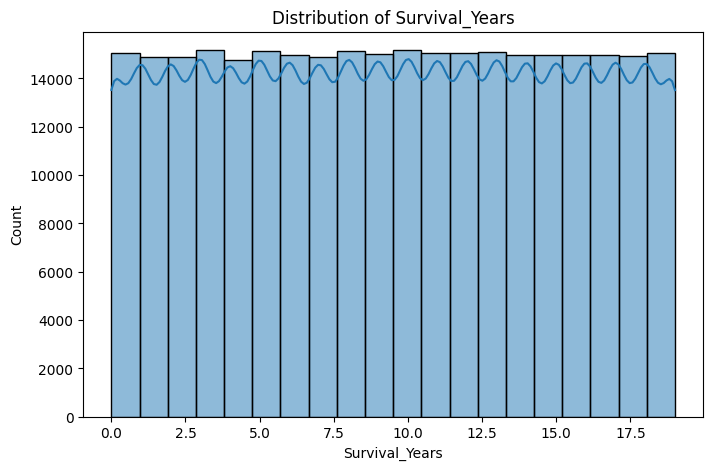

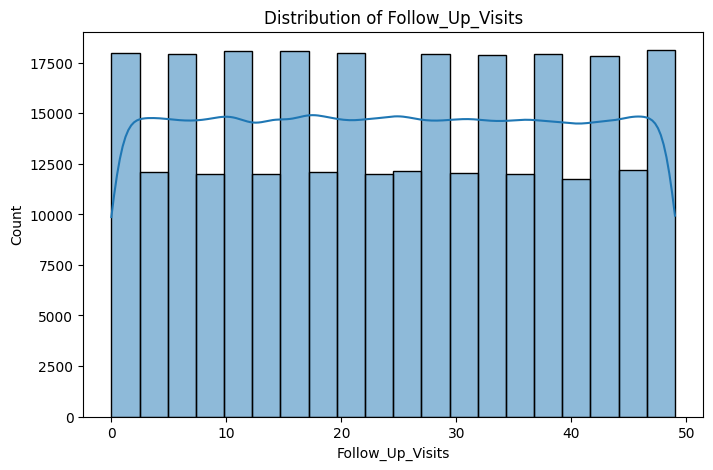

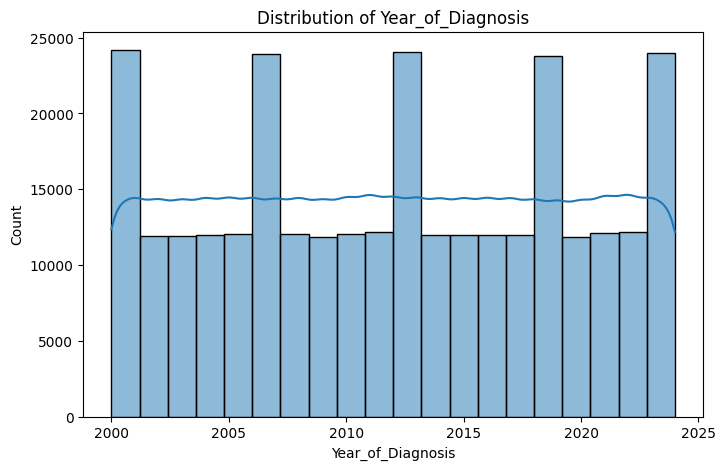

In [12]:

# Plot histogram for each numerical column

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

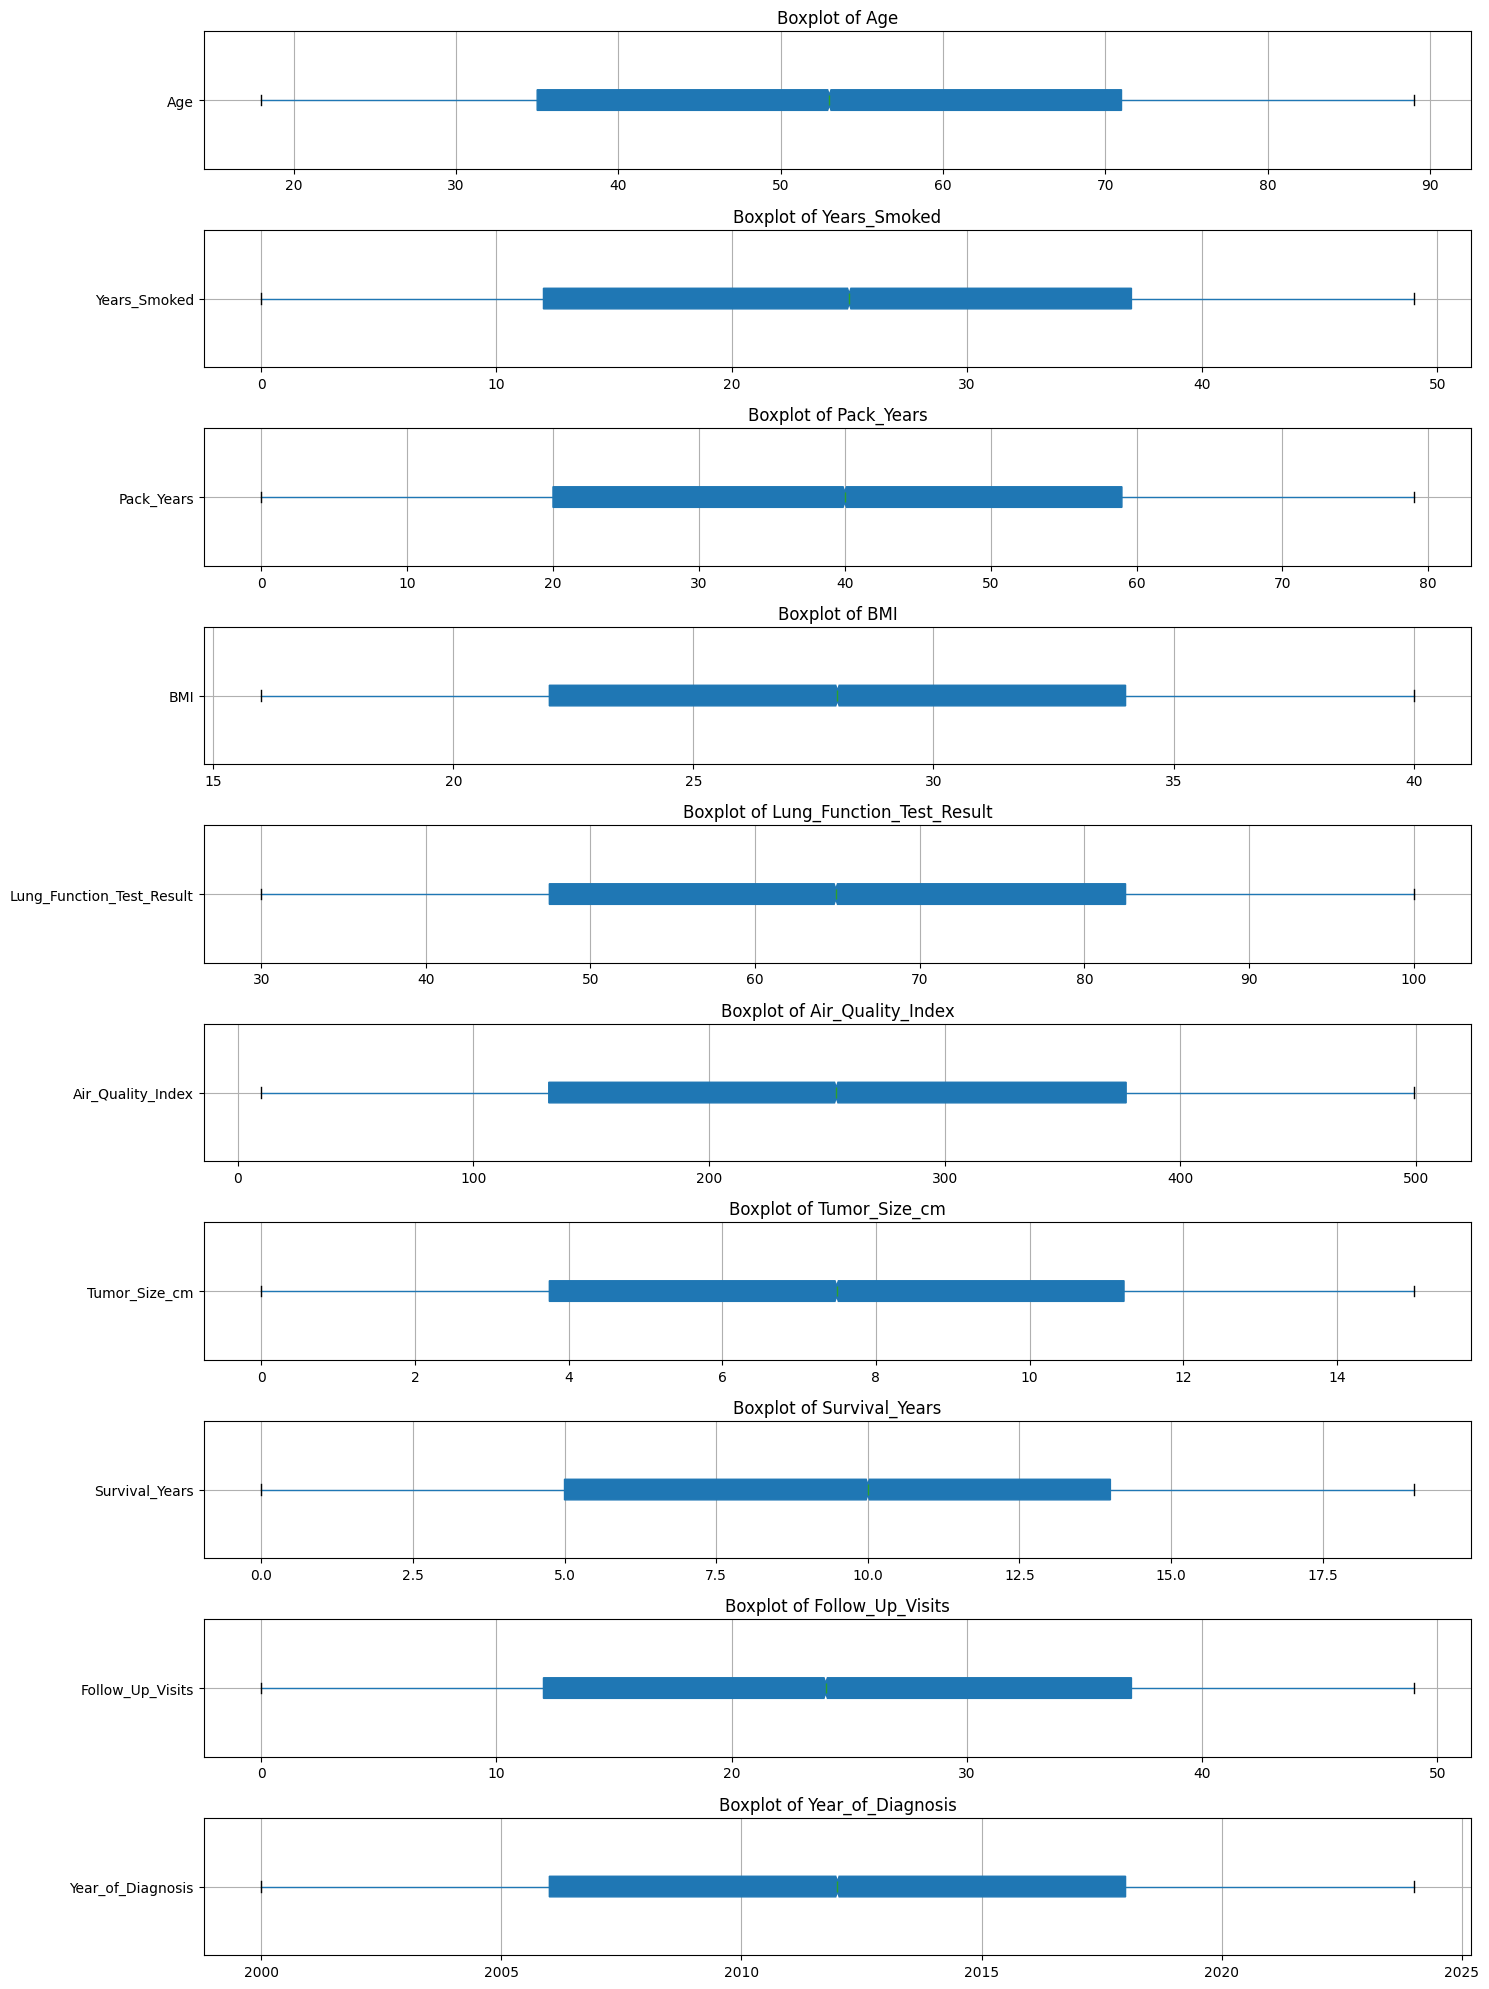

In [13]:
# Generate the boxplot graph

plt.figure(figsize=(15, len(numerical_columns) * 2))  # Adjust figsize as needed

# Create individual subplots for each variable
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    data.boxplot(column=column, vert=False, patch_artist=True, notch=True)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [14]:
# Show the categorical columns

categorical_columns = data.columns.difference(numerical_columns).difference(['Diagnosis'])
print(f"Categorical columns: ", categorical_columns)


Categorical columns:  Index(['Chest_Pain_Symptoms', 'Chronic_Cough', 'Comorbidities',
       'Dietary_Habits', 'Exposure_to_Toxins', 'Family_History_Cancer',
       'Gender', 'Medication_Response', 'Metastasis_Status', 'Occupation',
       'Physical_Activity_Level', 'Previous_Cancer_Diagnosis',
       'Residential_Area', 'Shortness_of_Breath', 'Smoking_History',
       'Stage_of_Cancer', 'Symptom_Progression', 'Treatment_Type',
       'Weight_Loss'],
      dtype='object')


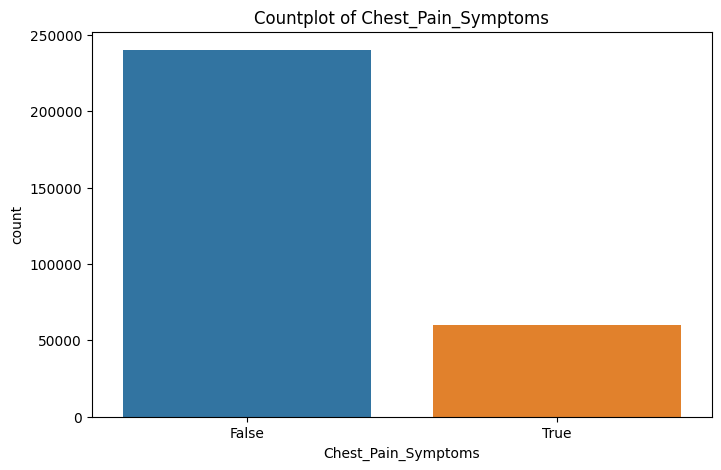

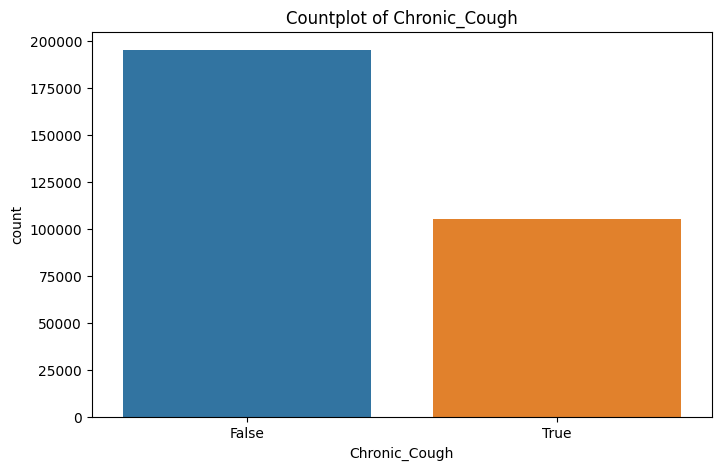

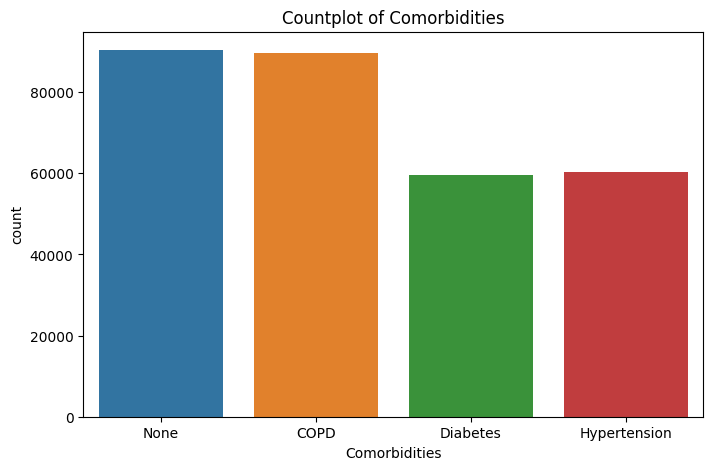

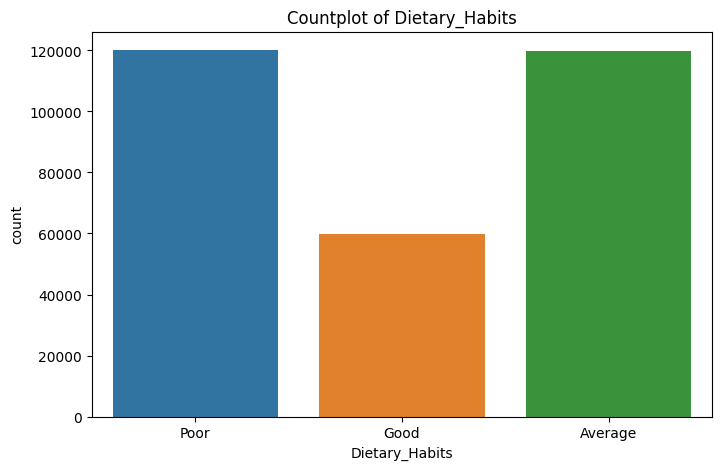

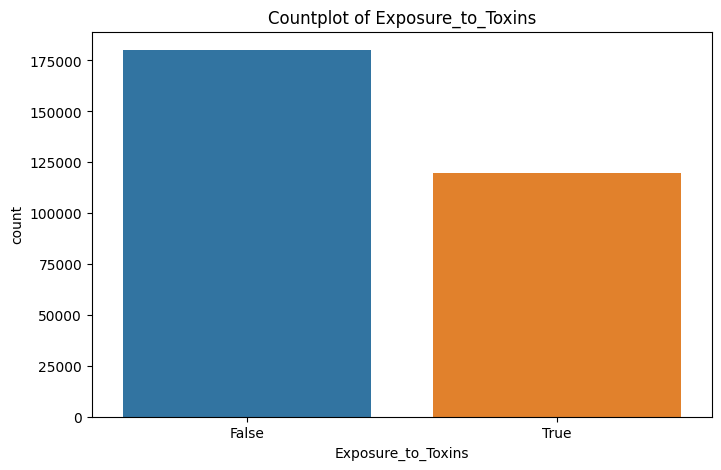

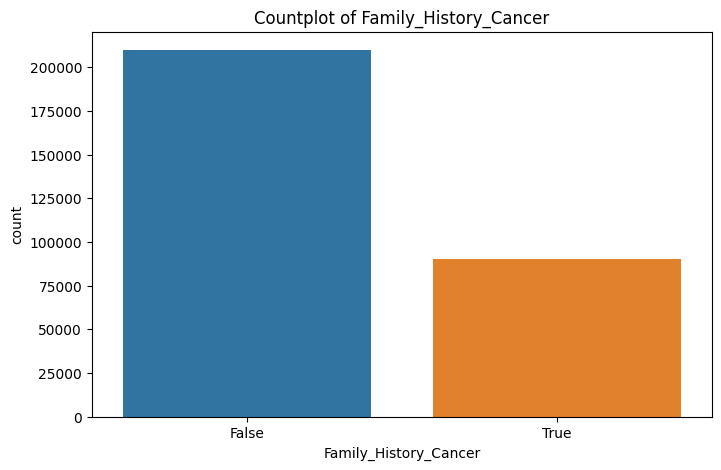

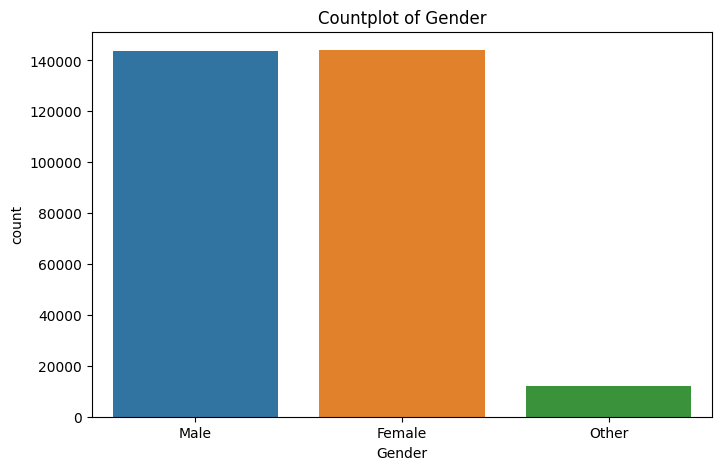

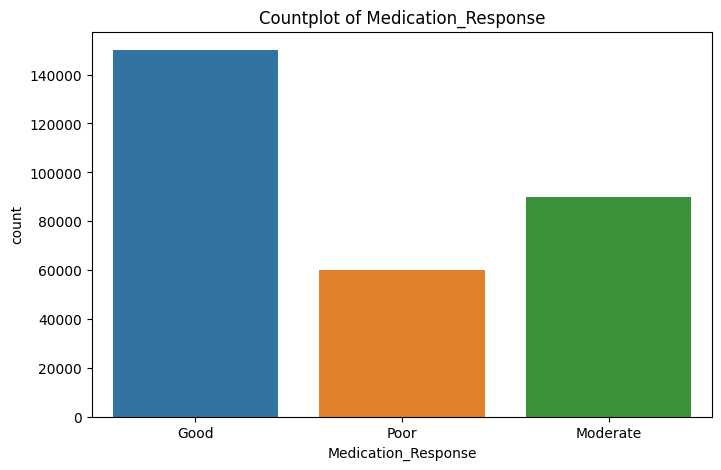

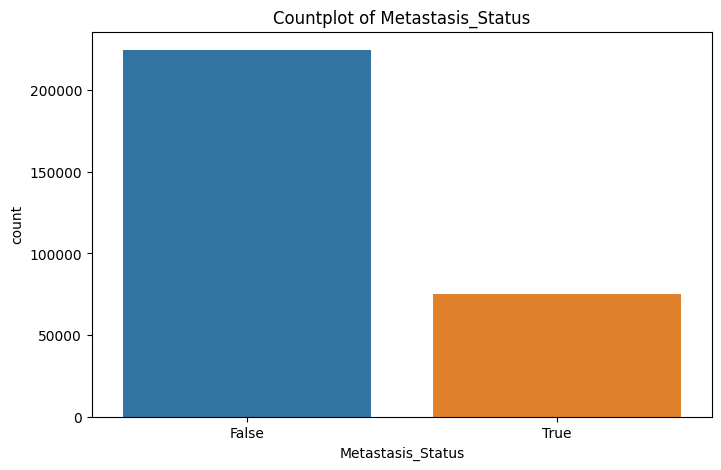

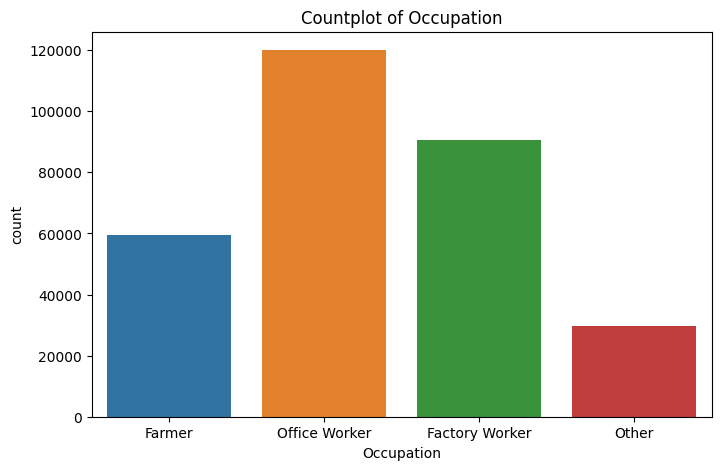

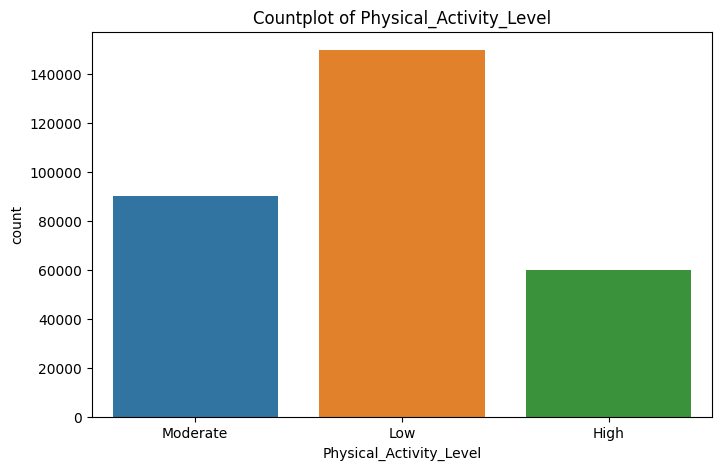

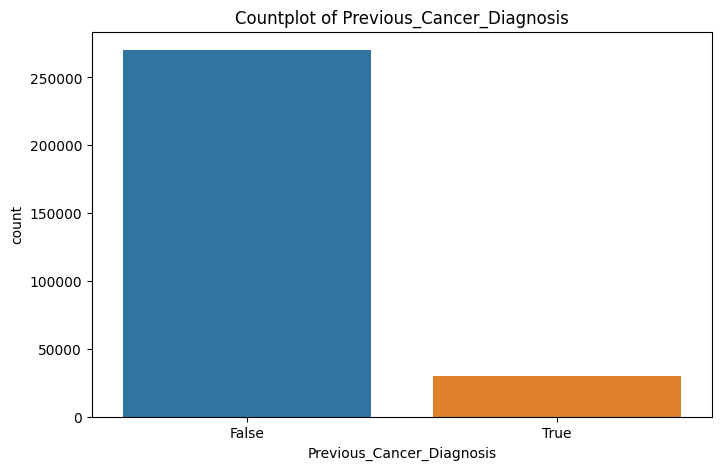

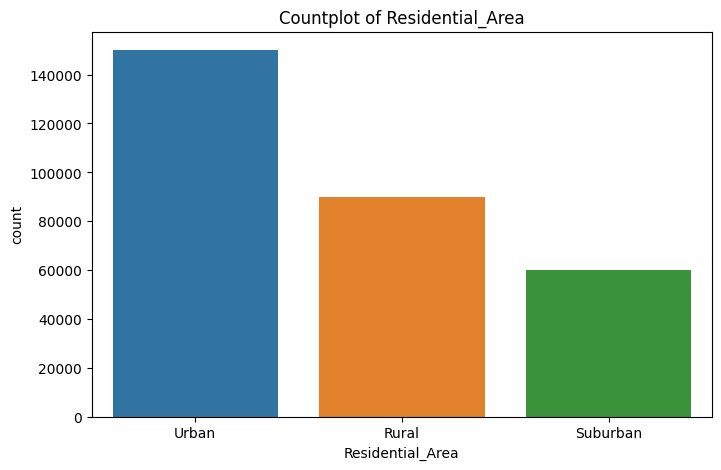

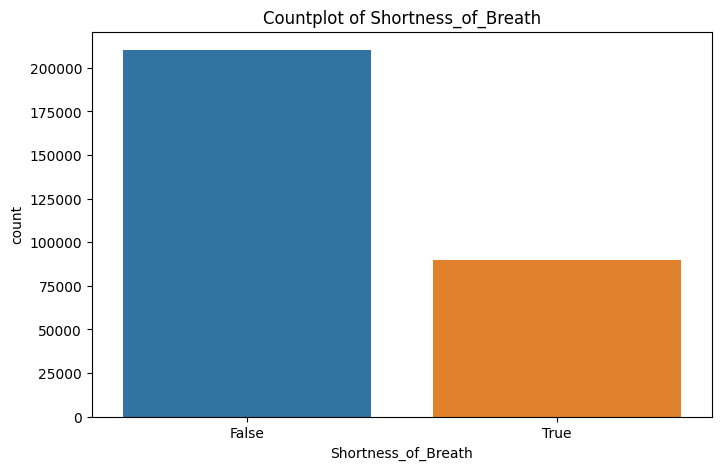

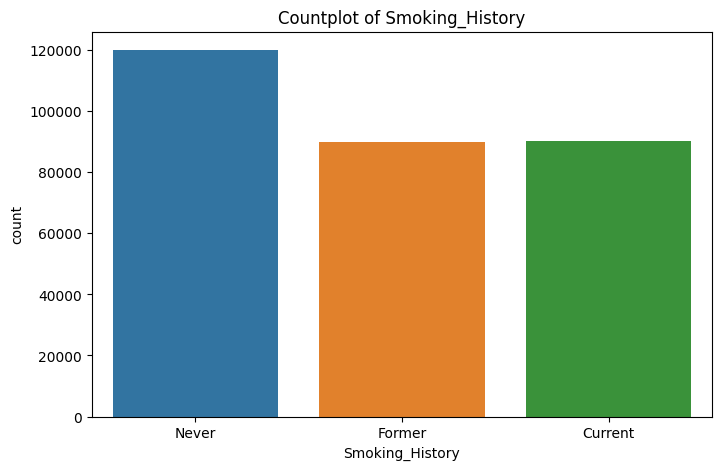

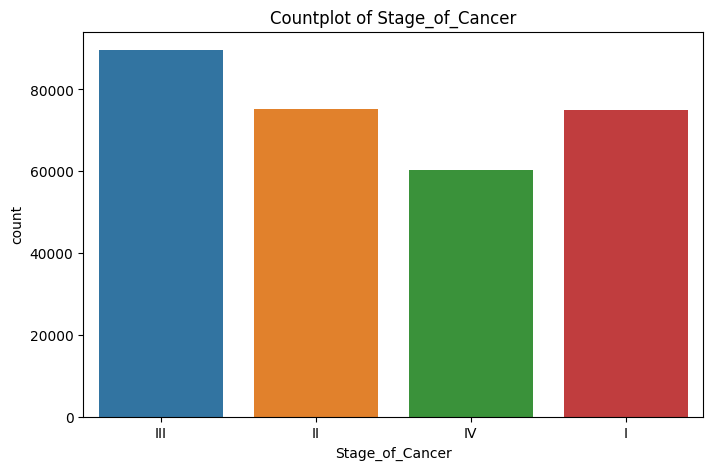

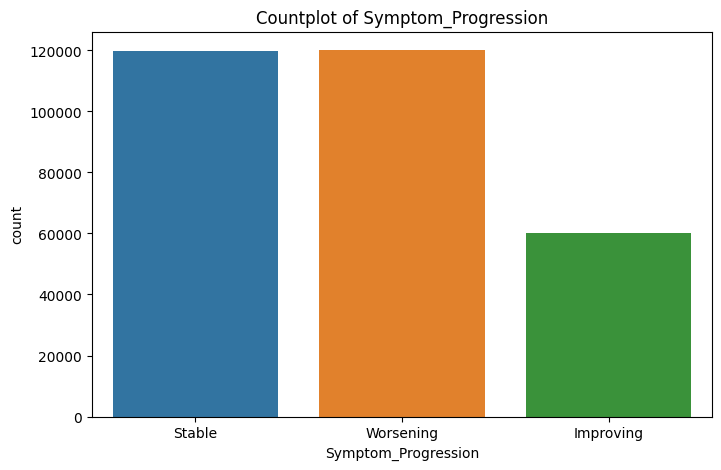

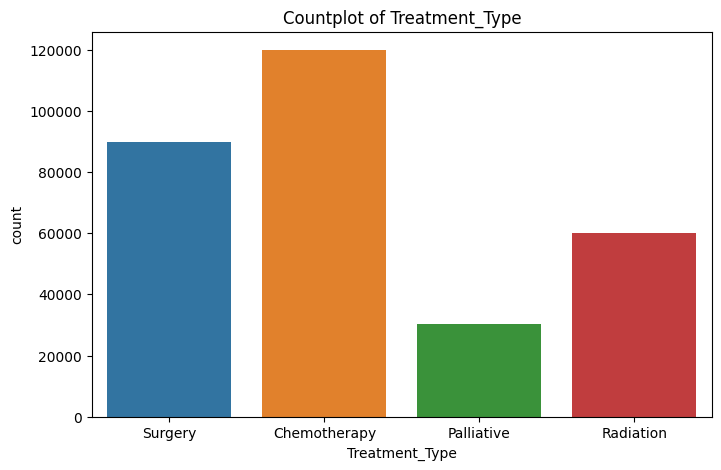

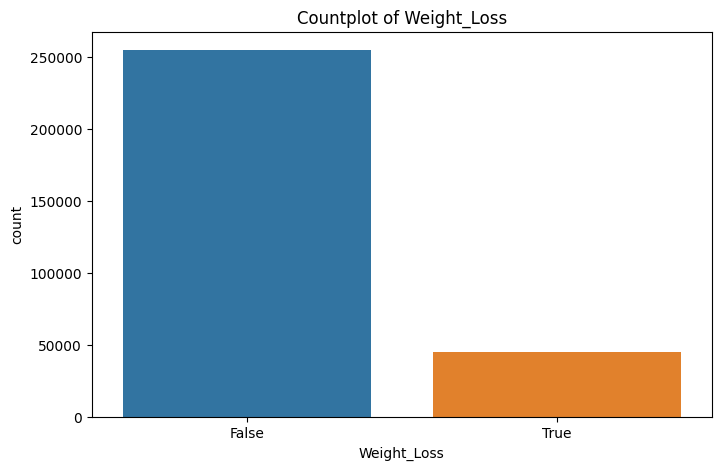

In [15]:
# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=column)
    plt.title(f'Countplot of {column}')


    plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1 to 300000
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        300000 non-null  int64  
 1   Gender                     300000 non-null  object 
 2   Smoking_History            300000 non-null  object 
 3   Years_Smoked               300000 non-null  int64  
 4   Pack_Years                 300000 non-null  int64  
 5   Family_History_Cancer      300000 non-null  bool   
 6   Occupation                 300000 non-null  object 
 7   Exposure_to_Toxins         300000 non-null  bool   
 8   Residential_Area           300000 non-null  object 
 9   BMI                        300000 non-null  float64
 10  Lung_Function_Test_Result  300000 non-null  float64
 11  Chest_Pain_Symptoms        300000 non-null  bool   
 12  Shortness_of_Breath        300000 non-null  bool   
 13  Chronic_Cough              300000 

In [17]:
df = pd.DataFrame(data)

boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)


In [18]:
df.dtypes

Age                            int64
Gender                        object
Smoking_History               object
Years_Smoked                   int64
Pack_Years                     int64
Family_History_Cancer          int32
Occupation                    object
Exposure_to_Toxins             int32
Residential_Area              object
BMI                          float64
Lung_Function_Test_Result    float64
Chest_Pain_Symptoms            int32
Shortness_of_Breath            int32
Chronic_Cough                  int32
Weight_Loss                    int32
Physical_Activity_Level       object
Dietary_Habits                object
Air_Quality_Index              int64
Comorbidities                 object
Previous_Cancer_Diagnosis      int32
Tumor_Size_cm                float64
Metastasis_Status              int32
Stage_of_Cancer               object
Treatment_Type                object
Survival_Years                 int64
Follow_Up_Visits               int64
Medication_Response           object
S

In [19]:
data

,Age,Gender,Smoking_History,Years_Smoked,Pack_Years,Family_History_Cancer,Occupation,Exposure_to_Toxins,Residential_Area,BMI,...,Previous_Cancer_Diagnosis,Tumor_Size_cm,Metastasis_Status,Stage_of_Cancer,Treatment_Type,Survival_Years,Follow_Up_Visits,Medication_Response,Symptom_Progression,Year_of_Diagnosis
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,69,Male,Never,30,3,False,Farmer,False,Urban,27.8,...,True,11.02,True,III,Surgery,12,24,Good,Stable,2007
2,32,Female,Former,6,61,False,Office Worker,False,Urban,16.3,...,False,14.29,True,II,Chemotherapy,6,12,Poor,Stable,2009
3,89,Male,Never,2,9,True,Office Worker,True,Rural,18.1,...,False,9.47,False,III,Chemotherapy,6,15,Good,Worsening,2015
4,78,Female,Never,11,69,False,Factory Worker,True,Urban,22.3,...,False,2.22,False,IV,Chemotherapy,13,25,Moderate,Improving,2012
5,38,Male,Former,11,57,False,Farmer,False,Rural,28.3,...,False,8.26,False,III,Palliative,3,4,Good,Stable,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299996,64,Male,Current,45,47,False,Office Worker,True,Urban,25.5,...,False,10.80,False,IV,Chemotherapy,19,24,Good,Worsening,2015
299997,46,Other,Never,12,70,True,Factory Worker,False,Urban,35.0,...,False,6.15,False,III,Chemotherapy,13,49,Good,Worsening,2013
299998,44,Female,Never,1,23,False,Factory Worker,False,Urban,16.3,...,False,0.81,False,IV,Chemotherapy,7,0,Good,Improving,2024


In [20]:
categorical_cols = ['Gender', 'Occupation', 'Residential_Area', 'Comorbidities', 'Treatment_Type']
df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1 to 300000
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         300000 non-null  int64  
 1   Smoking_History             300000 non-null  object 
 2   Years_Smoked                300000 non-null  int64  
 3   Pack_Years                  300000 non-null  int64  
 4   Family_History_Cancer       300000 non-null  bool   
 5   Exposure_to_Toxins          300000 non-null  bool   
 6   BMI                         300000 non-null  float64
 7   Lung_Function_Test_Result   300000 non-null  float64
 8   Chest_Pain_Symptoms         300000 non-null  bool   
 9   Shortness_of_Breath         300000 non-null  bool   
 10  Chronic_Cough               300000 non-null  bool   
 11  Weight_Loss                 300000 non-null  bool   
 12  Physical_Activity_Level     300000 non-null  object 
 13  Dietary_Habits     

In [22]:
boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)

In [23]:
df

,Age,Smoking_History,Years_Smoked,Pack_Years,Family_History_Cancer,Exposure_to_Toxins,BMI,Lung_Function_Test_Result,Chest_Pain_Symptoms,Shortness_of_Breath,...,Occupation_Office Worker,Occupation_Other,Residential_Area_Suburban,Residential_Area_Urban,Comorbidities_Diabetes,Comorbidities_Hypertension,Comorbidities_None,Treatment_Type_Palliative,Treatment_Type_Radiation,Treatment_Type_Surgery
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,69,Never,30,3,0,0,27.8,38.1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,32,Former,6,61,0,0,16.3,95.1,0,0,...,1,0,0,1,0,0,1,0,0,0
3,89,Never,2,9,1,1,18.1,62.4,0,0,...,1,0,0,0,0,0,0,0,0,0
4,78,Never,11,69,0,1,22.3,62.9,0,1,...,0,0,0,1,1,0,0,0,0,0
5,38,Former,11,57,0,0,28.3,70.6,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299996,64,Current,45,47,0,1,25.5,37.1,0,1,...,1,0,0,1,0,0,0,0,0,0
299997,46,Never,12,70,1,0,35.0,34.9,0,0,...,0,0,0,1,0,0,0,0,0,0
299998,44,Never,1,23,0,0,16.3,68.7,0,0,...,0,0,0,1,0,0,1,0,0,0


In [24]:
df['Smoking_History'] = df['Smoking_History'].map({'Never': 0, 'Former': 1, 'Current': 2})

df['Physical_Activity_Level'] = df['Physical_Activity_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df['Dietary_Habits'] = df['Dietary_Habits'].map({'Poor': 1, 'Average': 2, 'Good': 3})

df['Stage_of_Cancer'] = df['Stage_of_Cancer'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4})
df['Medication_Response'] = df['Medication_Response'].map({'Poor': 0, 'Moderate': 1, 'Good': 2})
df['Symptom_Progression'] = df['Symptom_Progression'].map({'Worsening': -1, 'Stable': 0, 'Improving': 1})


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1 to 300000
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         300000 non-null  int64  
 1   Smoking_History             300000 non-null  int64  
 2   Years_Smoked                300000 non-null  int64  
 3   Pack_Years                  300000 non-null  int64  
 4   Family_History_Cancer       300000 non-null  int32  
 5   Exposure_to_Toxins          300000 non-null  int32  
 6   BMI                         300000 non-null  float64
 7   Lung_Function_Test_Result   300000 non-null  float64
 8   Chest_Pain_Symptoms         300000 non-null  int32  
 9   Shortness_of_Breath         300000 non-null  int32  
 10  Chronic_Cough               300000 non-null  int32  
 11  Weight_Loss                 300000 non-null  int32  
 12  Physical_Activity_Level     300000 non-null  int64  
 13  Dietary_Habits     

In [26]:
df

,Age,Smoking_History,Years_Smoked,Pack_Years,Family_History_Cancer,Exposure_to_Toxins,BMI,Lung_Function_Test_Result,Chest_Pain_Symptoms,Shortness_of_Breath,...,Occupation_Office Worker,Occupation_Other,Residential_Area_Suburban,Residential_Area_Urban,Comorbidities_Diabetes,Comorbidities_Hypertension,Comorbidities_None,Treatment_Type_Palliative,Treatment_Type_Radiation,Treatment_Type_Surgery
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1,69,0,30,3,0,0,27.8,38.1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,32,1,6,61,0,0,16.3,95.1,0,0,...,1,0,0,1,0,0,1,0,0,0
3,89,0,2,9,1,1,18.1,62.4,0,0,...,1,0,0,0,0,0,0,0,0,0
4,78,0,11,69,0,1,22.3,62.9,0,1,...,0,0,0,1,1,0,0,0,0,0
5,38,1,11,57,0,0,28.3,70.6,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299996,64,2,45,47,0,1,25.5,37.1,0,1,...,1,0,0,1,0,0,0,0,0,0
299997,46,0,12,70,1,0,35.0,34.9,0,0,...,0,0,0,1,0,0,0,0,0,0
299998,44,0,1,23,0,0,16.3,68.7,0,0,...,0,0,0,1,0,0,1,0,0,0


                                 Age  Smoking_History  Years_Smoked  \
Age                         1.000000         0.001435     -0.001336   
Smoking_History             0.001435         1.000000      0.000597   
Years_Smoked               -0.001336         0.000597      1.000000   
Pack_Years                  0.000193         0.001544      0.000829   
Family_History_Cancer       0.000231         0.001377      0.002730   
Exposure_to_Toxins          0.000926        -0.002429     -0.001330   
BMI                         0.000821        -0.003974      0.004657   
Lung_Function_Test_Result   0.003446         0.001262     -0.000444   
Chest_Pain_Symptoms         0.002141        -0.001974     -0.002376   
Shortness_of_Breath         0.004287        -0.000956     -0.000868   
Chronic_Cough               0.000190        -0.000268     -0.001892   
Weight_Loss                 0.002782         0.002849     -0.000469   
Physical_Activity_Level    -0.000615         0.002048     -0.001078   
Dietar

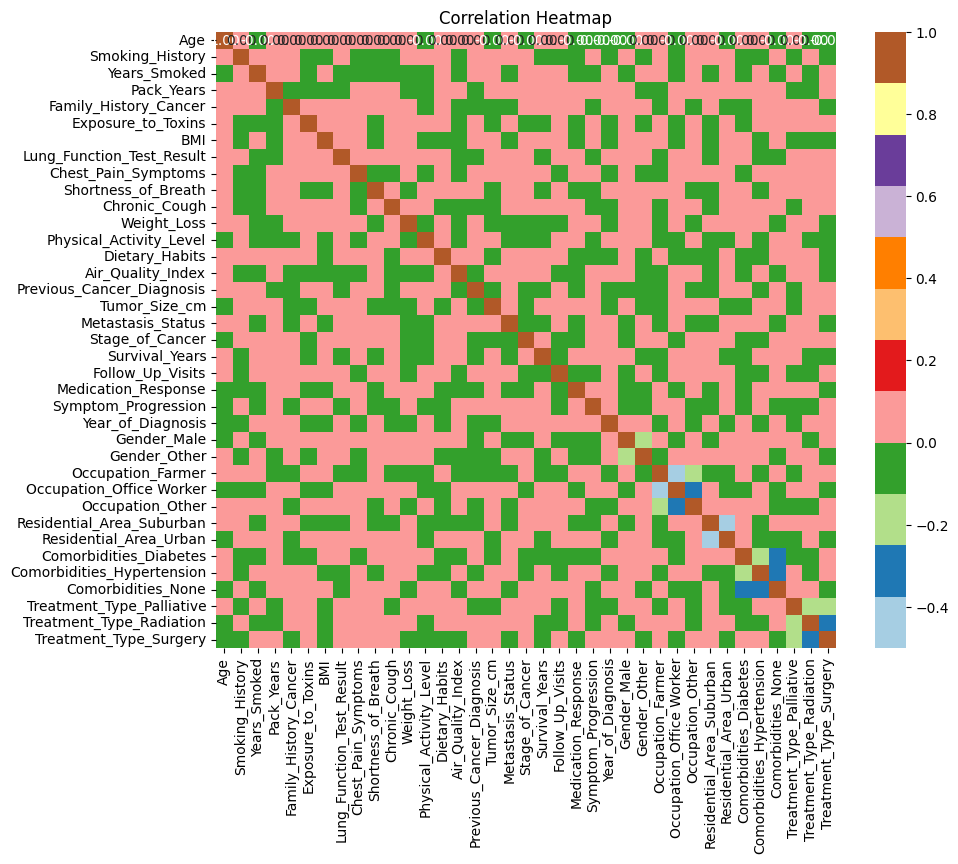

In [27]:
data_numeric = df.select_dtypes(include=['int32', 'int64' , 'float64'])
# Compute correlation matrix

correlation_matrix = data_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Paired', fmt='.2f') #, linewidths=0.5
plt.title('Correlation Heatmap')
plt.show()


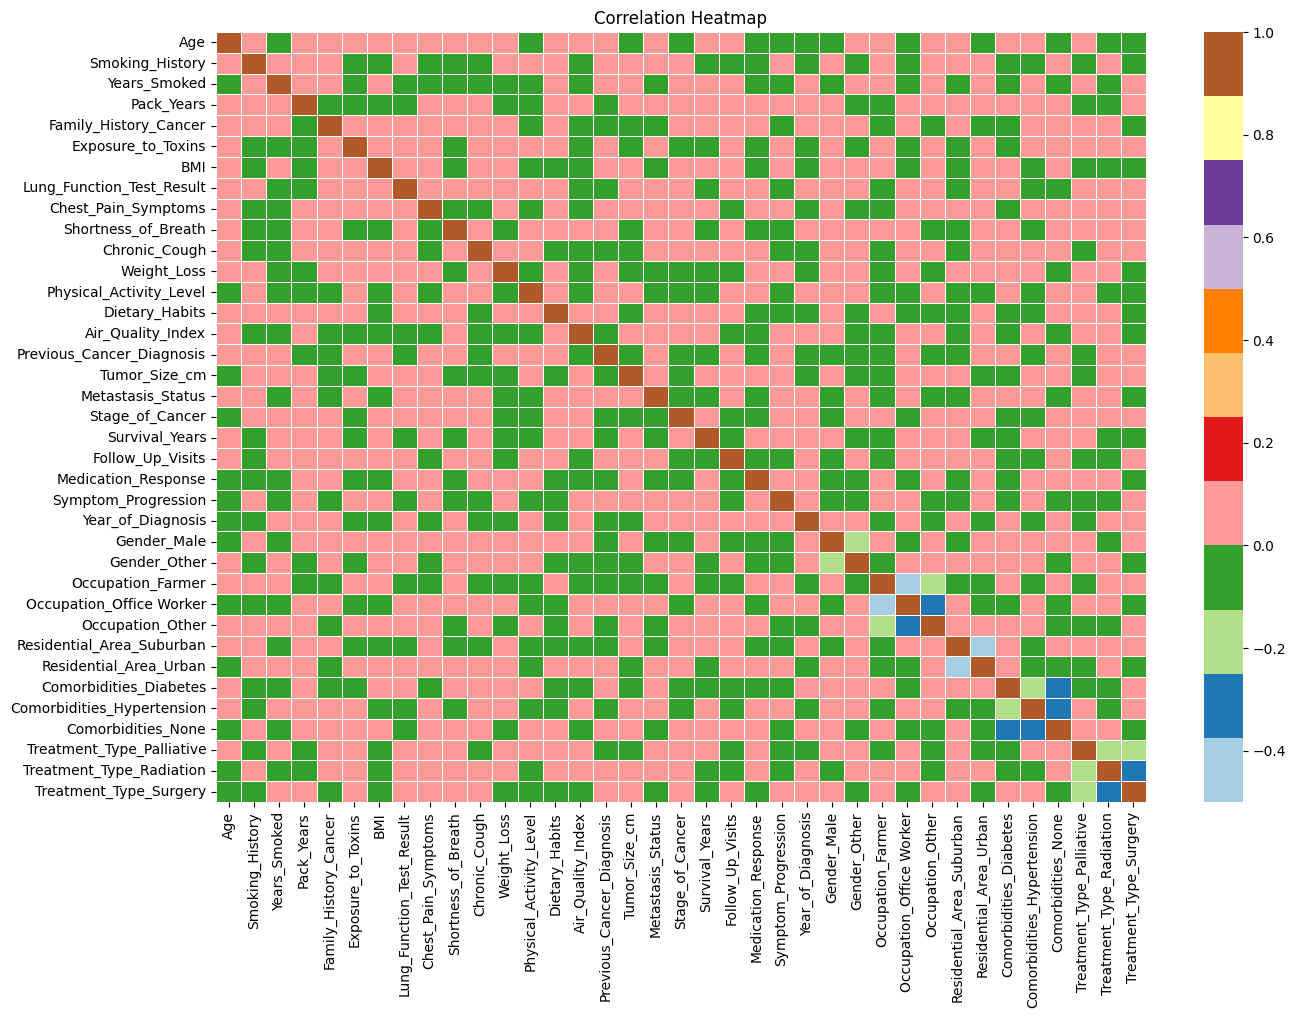

In [28]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=False, cmap='Paired', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

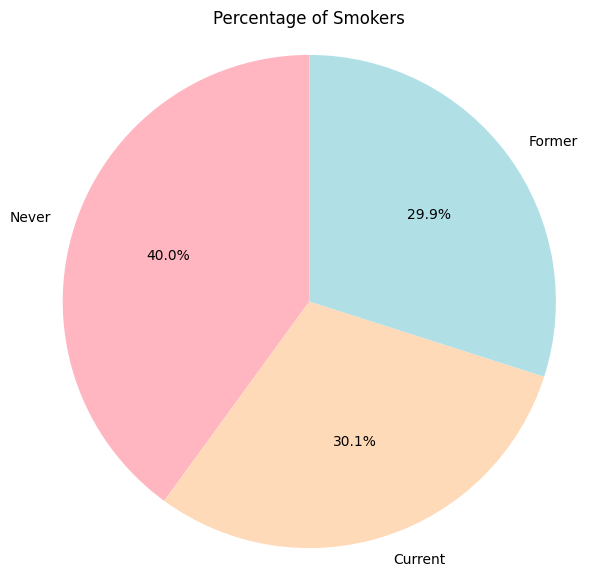

In [29]:
# 1 Count smokers and non-smokers (assuming 'smoking_status' is the column name)
smoking_counts = data['Smoking_History'].value_counts()  # Adjust column name
labels = smoking_counts.index.tolist()  # Extract categories (e.g., ['Smokers', 'Non-Smokers'])
sizes = smoking_counts.values.tolist()  # Extract counts

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FFB6C1', '#FFDAB9', '#B0E0E6'])
plt.title('Percentage of Smokers')
plt.axis('equal')
plt.show()


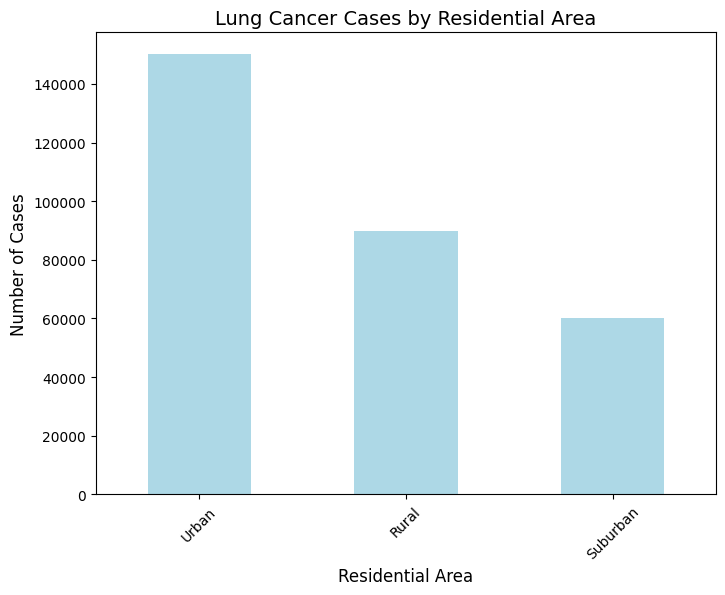

In [30]:
# 2 Bar chart for residential area distribution
residential_counts = data['Residential_Area'].value_counts()
residential_counts.plot(kind='bar', color='lightblue', figsize=(8, 6))
plt.title('Lung Cancer Cases by Residential Area', fontsize=14)
plt.xlabel('Residential Area', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()


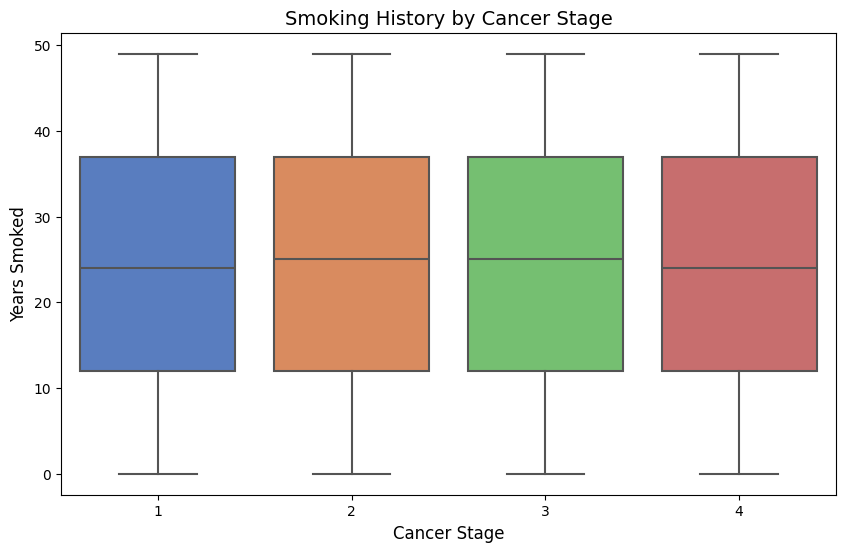

In [31]:
# 3 Box plot for smoking history by cancer stage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stage_of_Cancer', y='Years_Smoked', palette='muted')
plt.title('Smoking History by Cancer Stage', fontsize=14)
plt.xlabel('Cancer Stage', fontsize=12)
plt.ylabel('Years Smoked', fontsize=12)
plt.show()


Stage_of_Cancer         I        II       III        IV
Gender                                                 
Female           7.489957  7.522760  7.462451  7.492001
Male             7.512891  7.483185  7.495144  7.489583
Other            7.486073  7.362577  7.508930  7.456848


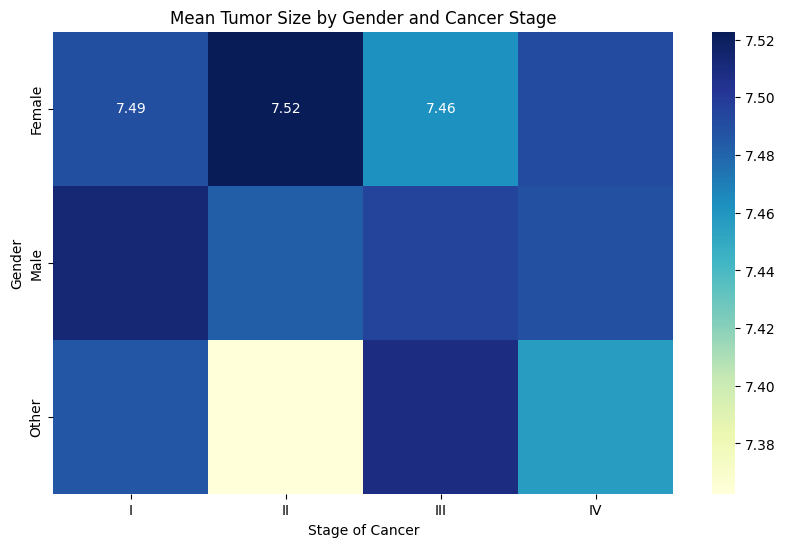

In [32]:
# 4 Heatmap for mean tumor size by gender and cancer stage

pivot_table_mean = data.pivot_table(index='Gender', columns='Stage_of_Cancer', values='Tumor_Size_cm', aggfunc='mean', fill_value=0)
print(pivot_table_mean)


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_mean, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Mean Tumor Size by Gender and Cancer Stage')
plt.xlabel('Stage of Cancer')
plt.ylabel('Gender')
plt.show()


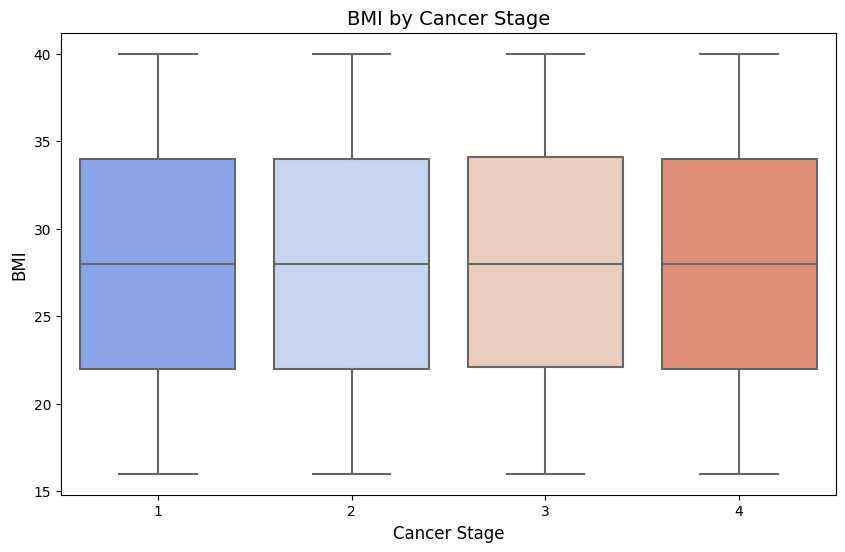

In [33]:
#5  Box plot for BMI and cancer stage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stage_of_Cancer', y='BMI', palette='coolwarm')
plt.title('BMI by Cancer Stage', fontsize=14)
plt.xlabel('Cancer Stage', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()


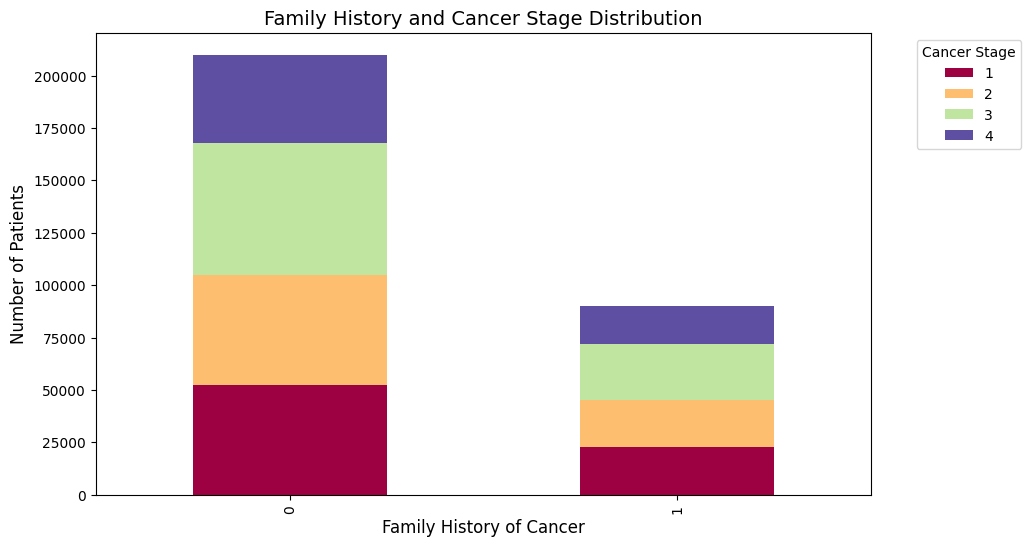

In [34]:
# 6 Stacked bar chart for family history vs cancer stage
pivot_family = df.pivot_table(index='Family_History_Cancer', columns='Stage_of_Cancer', aggfunc='size', fill_value=0)
pivot_family.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Spectral')
plt.title('Family History and Cancer Stage Distribution', fontsize=14)
plt.xlabel('Family History of Cancer', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='Cancer Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


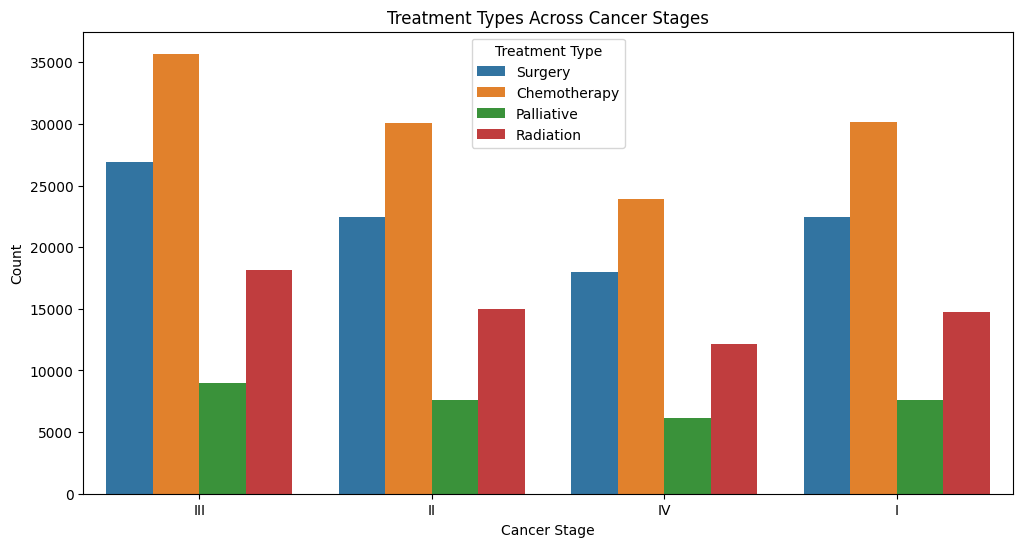

In [35]:
#7
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Stage_of_Cancer', hue='Treatment_Type')
plt.title('Treatment Types Across Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.legend(title='Treatment Type')
plt.show()


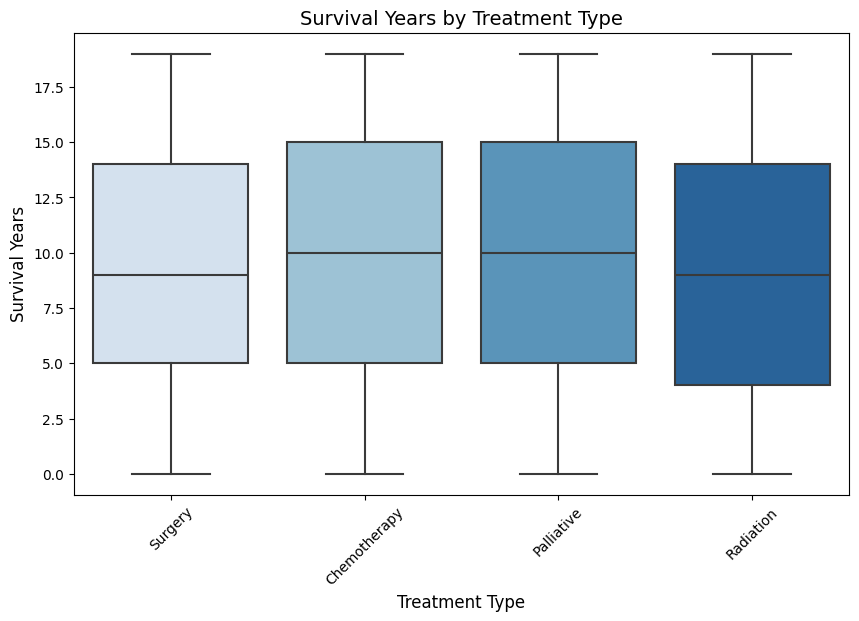

In [36]:
# 8 Box plot for treatment type vs survival years
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Treatment_Type', y='Survival_Years', palette='Blues')
plt.title('Survival Years by Treatment Type', fontsize=14)
plt.xlabel('Treatment Type', fontsize=12)
plt.ylabel('Survival Years', fontsize=12)
plt.xticks(rotation=45)
plt.show()


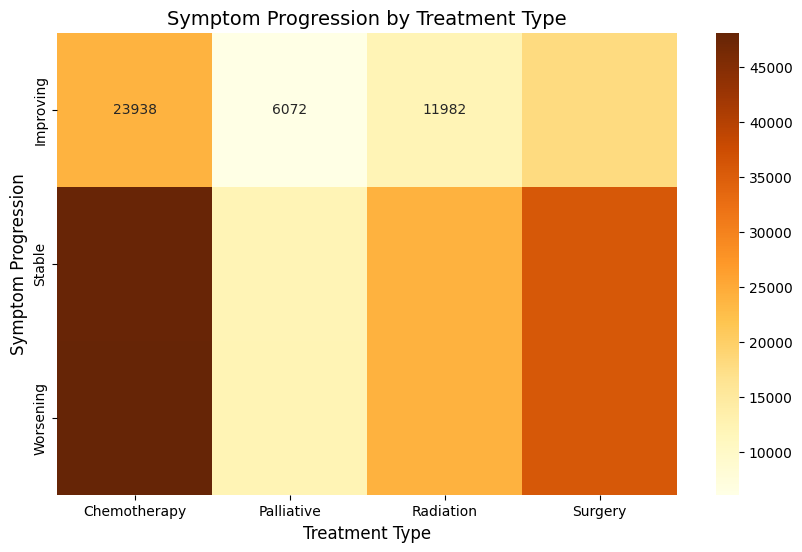

In [37]:
#9 Heatmap for symptom progression by treatment type
pivot_symptom = data.pivot_table(index='Symptom_Progression', columns='Treatment_Type', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_symptom, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Symptom Progression by Treatment Type', fontsize=14)
plt.xlabel('Treatment Type', fontsize=12)
plt.ylabel('Symptom Progression', fontsize=12)
plt.show()


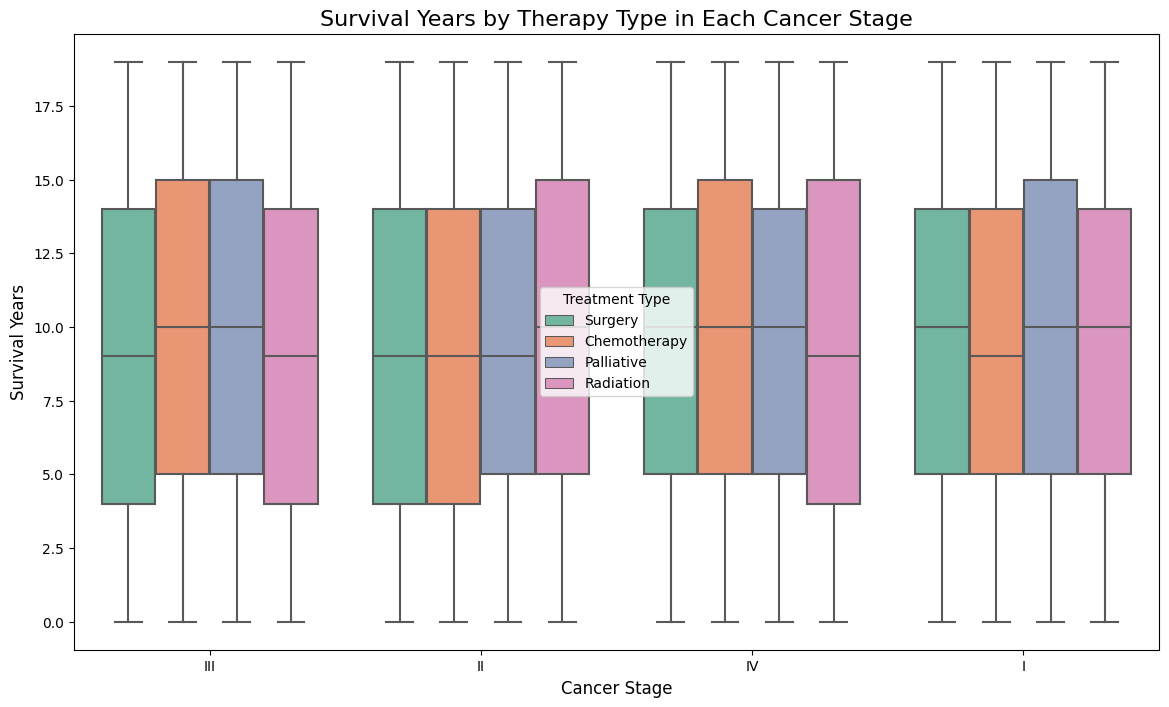

In [38]:
#10

plt.figure(figsize=(14, 8))

sns.boxplot(
    data=data,
    x='Stage_of_Cancer', 
    y='Survival_Years', 
    hue='Treatment_Type', 
    palette='Set2'
)

plt.title('Survival Years by Therapy Type in Each Cancer Stage', fontsize=16)
plt.xlabel('Cancer Stage', fontsize=12)
plt.ylabel('Survival Years', fontsize=12)
plt.legend(title='Treatment Type', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

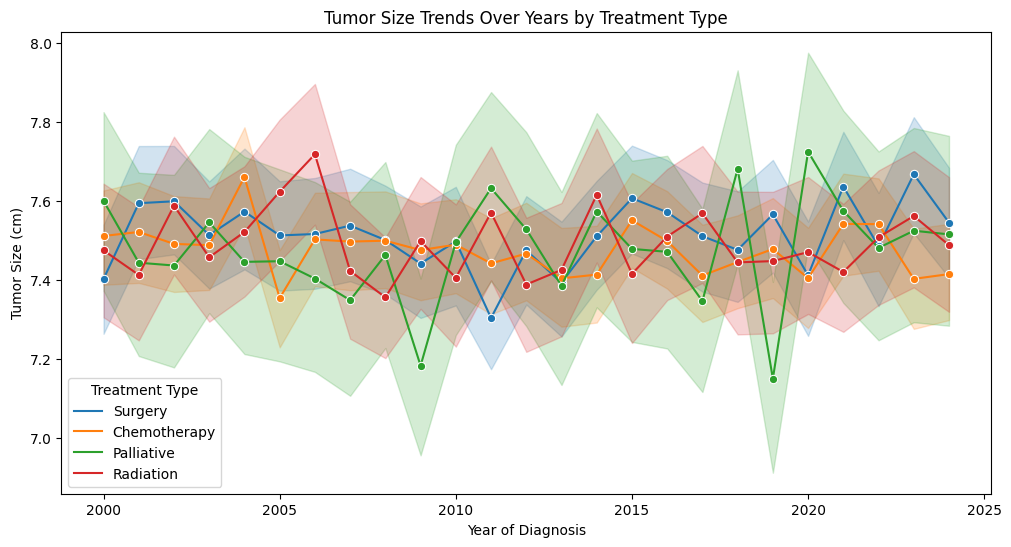

In [39]:
#11
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year_of_Diagnosis', y='Tumor_Size_cm', hue='Treatment_Type', marker='o', palette='tab10')
plt.title('Tumor Size Trends Over Years by Treatment Type')
plt.xlabel('Year of Diagnosis')
plt.ylabel('Tumor Size (cm)')
plt.legend(title='Treatment Type')
plt.show()


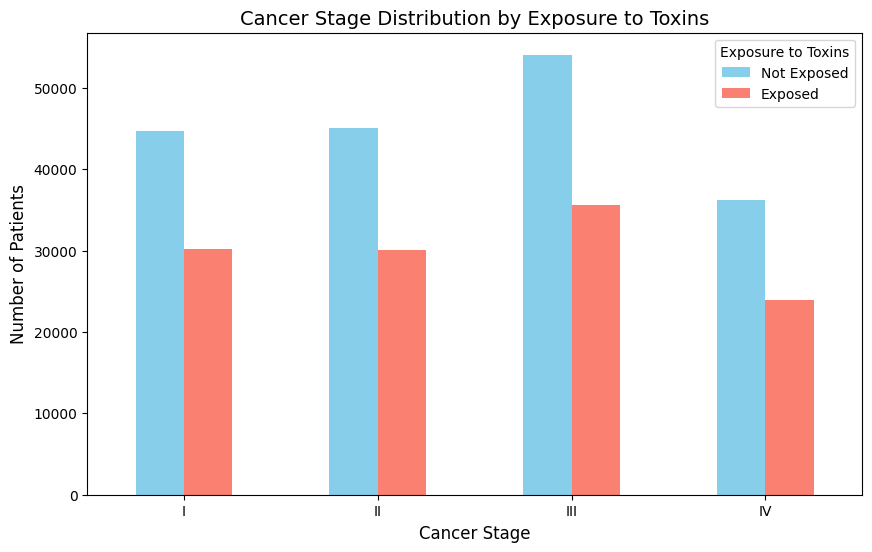

In [40]:
pivot_table_toxins = data.pivot_table(index='Stage_of_Cancer', 
                                      columns='Exposure_to_Toxins', 
                                      aggfunc='size',  # Count number of entries
                                      fill_value=0)

pivot_table_toxins.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Cancer Stage Distribution by Exposure to Toxins', fontsize=14)
plt.xlabel('Cancer Stage', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(['Not Exposed', 'Exposed'], title='Exposure to Toxins', fontsize=10)
plt.xticks(rotation=0)
plt.show()


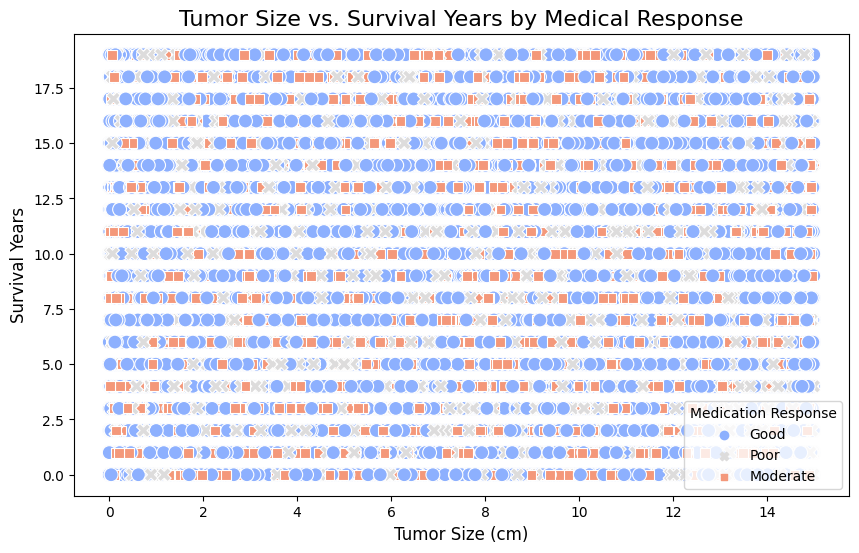

In [41]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=data, 
    x='Tumor_Size_cm', 
    y='Survival_Years', 
    hue='Medication_Response', 
    palette='coolwarm', 
    style='Medication_Response', 
    s=100
)

plt.title('Tumor Size vs. Survival Years by Medical Response', fontsize=16)
plt.xlabel('Tumor Size (cm)', fontsize=12)
plt.ylabel('Survival Years', fontsize=12)
plt.legend(title='Medication Response', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


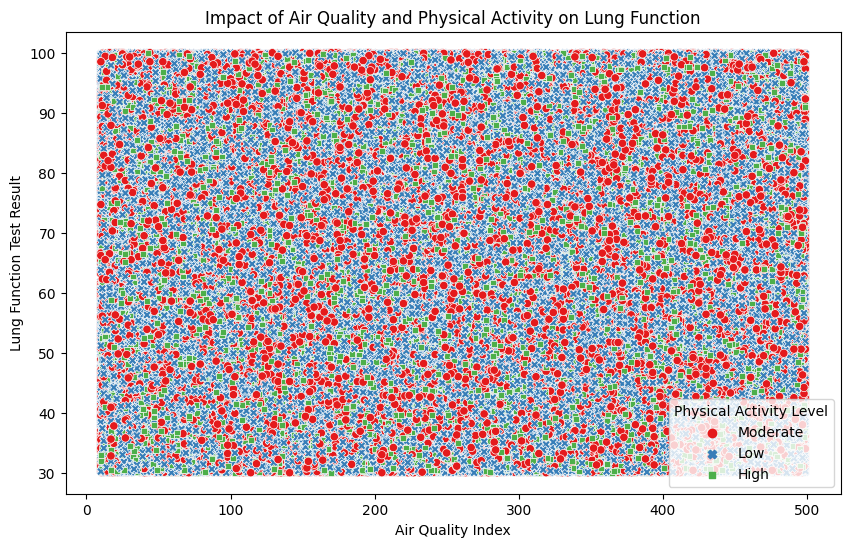

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Air_Quality_Index', y='Lung_Function_Test_Result', 
                hue='Physical_Activity_Level', style='Physical_Activity_Level', palette='Set1')
plt.title('Impact of Air Quality and Physical Activity on Lung Function')
plt.xlabel('Air Quality Index')
plt.ylabel('Lung Function Test Result')
plt.legend(title='Physical Activity Level')
plt.show()


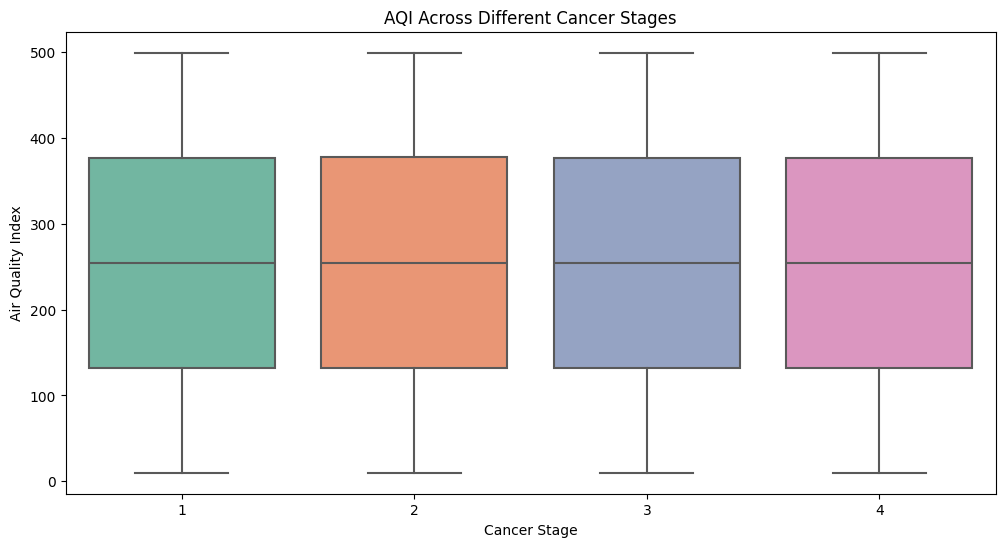

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Stage_of_Cancer', y='Air_Quality_Index', palette='Set2')
plt.title('AQI Across Different Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Air Quality Index')
plt.show()
